In [2]:
import pandas as pd
import numpy as np
from collections import Counter as c
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
import pickle



In [3]:
#loading the dataset 
data = pd.read_csv('chronickidneydisease.csv')
data

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [4]:
data.drop(['id'],axis=1,inplace=True) #drops id column in data

In [5]:
data

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [6]:
data.columns #returns all column names 

Index(['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr', 'bu',
       'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

In [7]:
data.columns = ['age','blood_pressure','specific_gravity','albumin',
                'sugar','red_blood_cells','pus_cell','pus_cell_clumps',
                'bacteria','blood_glucose_random','blood_urea','serum_creatinine'
                ,'sodium','potassium','hemoglobin','packed_cell_volume','white_blood_cell_count',
                'red_blood_cell_count','hypertension','diabetes_mellitus','coronary_artery_disease',
                'appetite','pedal_edema','anemia','class'] #manually giving the name of the columns
data.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [8]:
data

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [9]:
data.info() #info will give us a summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  hemoglobin               3

In [10]:
data['class'].unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [11]:
data['class'] = data['class'].replace("ckd\t","ckd")
data['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [12]:
data

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [13]:
data['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [14]:
data['class'] = data['class'].replace("ckd\t","ckd")
data['class'].unique()

array(['ckd', 'notckd'], dtype=object)

In [15]:
data

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [16]:
data['coronary_artery_disease'].unique()

array(['no', 'yes', '\tno', nan], dtype=object)

In [17]:
data['coronary_artery_disease'] = data['coronary_artery_disease'].replace('\tno','no')
c(data['coronary_artery_disease'])

Counter({'no': 364, 'yes': 34, nan: 2})

In [18]:
data['diabetes_mellitus'].unique()

array(['yes', 'no', ' yes', '\tno', '\tyes', nan], dtype=object)

In [19]:
data['diabetes_mellitus'] = data['diabetes_mellitus'].replace(to_replace={"\tno":"no","\tyes":"yes"," yes":"yes"})
c(data['diabetes_mellitus'])

Counter({'no': 261, 'yes': 137, nan: 2})

In [20]:
data.isnull().any()

age                         True
blood_pressure              True
specific_gravity            True
albumin                     True
sugar                       True
red_blood_cells             True
pus_cell                    True
pus_cell_clumps             True
bacteria                    True
blood_glucose_random        True
blood_urea                  True
serum_creatinine            True
sodium                      True
potassium                   True
hemoglobin                  True
packed_cell_volume          True
white_blood_cell_count      True
red_blood_cell_count        True
hypertension                True
diabetes_mellitus           True
coronary_artery_disease     True
appetite                    True
pedal_edema                 True
anemia                      True
class                      False
dtype: bool

In [21]:
data.isnull().sum()

age                          9
blood_pressure              12
specific_gravity            47
albumin                     46
sugar                       49
red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed_cell_volume          70
white_blood_cell_count     105
red_blood_cell_count       130
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
pedal_edema                  1
anemia                       1
class                        0
dtype: int64

In [22]:
data.packed_cell_volume = pd.to_numeric(data.packed_cell_volume,errors='coerce')
data.white_blood_cell_count = pd.to_numeric(data.white_blood_cell_count,errors='coerce')
data.red_blood_cell_count  = pd.to_numeric(data.red_blood_cell_count,errors='coerce')


In [23]:
data

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.0,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.0,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.0,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.0,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd


In [24]:
data['blood_glucose_random'].fillna(data['blood_glucose_random'].mean(),inplace=True)
data['blood_pressure'].fillna(data['blood_glucose_random'].mean(),inplace=True)
data['blood_urea'].fillna(data['blood_urea'].mean(),inplace=True)
data['hemoglobin'].fillna(data['hemoglobin'].mean(),inplace=True)
data['packed_cell_volume'].fillna(data['packed_cell_volume'].mean(),inplace=True)
data['potassium'].fillna(data['potassium'].mean(),inplace=True)
data['red_blood_cell_count'].fillna(data['red_blood_cell_count'].mean(),inplace=True)
data['serum_creatinine'].fillna(data['serum_creatinine'].mean(),inplace=True)
data['sodium'].fillna(data['sodium'].mean(),inplace=True)
data['white_blood_cell_count'].fillna(data['white_blood_cell_count'].mean(),inplace=True)

In [25]:
data['age'].fillna(data['age'].mode()[0],inplace=True)
data['hypertension'].fillna(data['hypertension'].mode()[0],inplace=True)
data['pus_cell_clumps'].fillna(data['pus_cell_clumps'].mode()[0],inplace=True)
data['appetite'].fillna(data['appetite'].mode()[0],inplace=True)
data['albumin'].fillna(data['albumin'].mode()[0],inplace=True)
data['pus_cell'].fillna(data['pus_cell'].mode()[0],inplace=True)
data['red_blood_cells'].fillna(data['red_blood_cells'].mode()[0],inplace=True)
data['bacteria'].fillna(data['bacteria'].mode()[0],inplace=True)
data['anemia'].fillna(data['anemia'].mode()[0],inplace=True)
data['sugar'].fillna(data['sugar'].mode()[0],inplace=True)
data['diabetes_mellitus'].fillna(data['diabetes_mellitus'].mode()[0],inplace=True)
data['pedal_edema'].fillna(data['pedal_edema'].mode()[0],inplace=True)
data[ 'specific_gravity'].fillna(data[ 'specific_gravity'].mode()[0],inplace=True)

In [26]:
data.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    2
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [27]:

#categorical Columns
catcols = set(data.dtypes[data.dtypes=='O'].index.values)
catcols

{'anemia',
 'appetite',
 'bacteria',
 'class',
 'coronary_artery_disease',
 'diabetes_mellitus',
 'hypertension',
 'pedal_edema',
 'pus_cell',
 'pus_cell_clumps',
 'red_blood_cells'}

In [28]:
#Continous Columns
contcols = set(data.dtypes[data.dtypes!='O'].index.values) #onlt fetech the float and int type columns 
#contcols = pd.DataFrame(data,columns=contcols)
contcols

{'age',
 'albumin',
 'blood_glucose_random',
 'blood_pressure',
 'blood_urea',
 'hemoglobin',
 'packed_cell_volume',
 'potassium',
 'red_blood_cell_count',
 'serum_creatinine',
 'sodium',
 'specific_gravity',
 'sugar',
 'white_blood_cell_count'}

In [29]:
for i in contcols:
    print("Continous columns :",i)
    print(c(data[i]))
    print("*"*120+'\n')

Continous columns : serum_creatinine
Counter({1.2: 40, 1.1: 24, 1.0: 23, 0.5: 23, 0.7: 22, 0.9: 22, 0.6: 18, 0.8: 17, 3.072454308093995: 17, 2.2: 10, 1.5: 9, 1.7: 9, 1.3: 8, 1.6: 8, 1.8: 7, 1.4: 7, 2.5: 7, 2.8: 7, 1.9: 6, 2.7: 5, 2.1: 5, 2.0: 5, 3.2: 5, 3.3: 5, 3.9: 4, 7.3: 4, 4.0: 3, 2.4: 3, 3.4: 3, 2.9: 3, 5.3: 3, 2.3: 3, 7.2: 2, 4.6: 2, 4.1: 2, 5.2: 2, 6.3: 2, 3.0: 2, 6.1: 2, 6.7: 2, 5.6: 2, 6.5: 2, 4.4: 2, 6.0: 2, 3.8: 1, 24.0: 1, 9.6: 1, 76.0: 1, 7.7: 1, 10.8: 1, 5.9: 1, 3.25: 1, 9.7: 1, 6.4: 1, 32.0: 1, 8.5: 1, 15.0: 1, 3.6: 1, 10.2: 1, 11.5: 1, 12.2: 1, 9.2: 1, 13.8: 1, 16.9: 1, 7.1: 1, 18.0: 1, 13.0: 1, 48.1: 1, 14.2: 1, 16.4: 1, 2.6: 1, 7.5: 1, 4.3: 1, 18.1: 1, 11.8: 1, 9.3: 1, 6.8: 1, 13.5: 1, 12.8: 1, 11.9: 1, 12.0: 1, 13.4: 1, 15.2: 1, 13.3: 1, 0.4: 1})
************************************************************************************************************************

Continous columns : specific_gravity
Counter({1.02: 153, 1.01: 84, 1.025: 81, 1.015: 75, 1.005: 7})
**

In [30]:
contcols

{'age',
 'albumin',
 'blood_glucose_random',
 'blood_pressure',
 'blood_urea',
 'hemoglobin',
 'packed_cell_volume',
 'potassium',
 'red_blood_cell_count',
 'serum_creatinine',
 'sodium',
 'specific_gravity',
 'sugar',
 'white_blood_cell_count'}

In [31]:
data

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44.0,7800.0,5.200000,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38.0,6000.0,4.707435,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31.0,7500.0,4.707435,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32.0,6700.0,3.900000,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35.0,7300.0,4.600000,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,140.000000,...,47.0,6700.0,4.900000,no,no,no,good,no,no,notckd
396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,75.000000,...,54.0,7800.0,6.200000,no,no,no,good,no,no,notckd
397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,100.000000,...,49.0,6600.0,5.400000,no,no,no,good,no,no,notckd
398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,114.000000,...,51.0,7200.0,5.900000,no,no,no,good,no,no,notckd


In [32]:
data['coronary_artery_disease'].unique()
c(data['coronary_artery_disease'])

Counter({'no': 364, 'yes': 34, nan: 2})

In [33]:
data['diabetes_mellitus'] = data['diabetes_mellitus'].replace(to_replace={"\tno":"no","\tyes":"yes"," yes":"yes"})
c(data['diabetes_mellitus'])

Counter({'no': 263, 'yes': 137})

In [34]:
data.isnull().any()

age                        False
blood_pressure             False
specific_gravity           False
albumin                    False
sugar                      False
red_blood_cells            False
pus_cell                   False
pus_cell_clumps            False
bacteria                   False
blood_glucose_random       False
blood_urea                 False
serum_creatinine           False
sodium                     False
potassium                  False
hemoglobin                 False
packed_cell_volume         False
white_blood_cell_count     False
red_blood_cell_count       False
hypertension               False
diabetes_mellitus          False
coronary_artery_disease     True
appetite                   False
pedal_edema                False
anemia                     False
class                      False
dtype: bool

In [35]:
data.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    2
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [36]:
print(data['coronary_artery_disease'].isnull().sum())

2


In [37]:
data.dropna(subset=['coronary_artery_disease'], inplace=True)

In [38]:
data.isnull().sum()

age                        0
blood_pressure             0
specific_gravity           0
albumin                    0
sugar                      0
red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
blood_glucose_random       0
blood_urea                 0
serum_creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed_cell_volume         0
white_blood_cell_count     0
red_blood_cell_count       0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
pedal_edema                0
anemia                     0
class                      0
dtype: int64

In [39]:
for i in catcols: #looping through all categorical columns
    print("Label Encoding of:", i)
    LEi = LabelEncoder() # creating an object of Label Encoder
    print(c(data[i]))
    data[i] = LEi.fit_transform(data[i])
    print(c(data[i]))
    print("*"*100)

Label Encoding of: bacteria
Counter({'notpresent': 376, 'present': 22})
Counter({0: 376, 1: 22})
****************************************************************************************************
Label Encoding of: appetite
Counter({'good': 316, 'poor': 82})
Counter({0: 316, 1: 82})
****************************************************************************************************
Label Encoding of: hypertension
Counter({'no': 251, 'yes': 147})
Counter({0: 251, 1: 147})
****************************************************************************************************
Label Encoding of: diabetes_mellitus
Counter({'no': 261, 'yes': 137})
Counter({0: 261, 1: 137})
****************************************************************************************************
Label Encoding of: pus_cell
Counter({'normal': 322, 'abnormal': 76})
Counter({1: 322, 0: 76})
****************************************************************************************************
Label Encoding of: pedal_edem

In [40]:
c(data['coronary_artery_disease'])

Counter({0: 364, 1: 34})

In [41]:
data['coronary_artery_disease'].unique()

array([0, 1])

In [42]:
data.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'packed_cell_volume',
       'white_blood_cell_count', 'red_blood_cell_count', 'hypertension',
       'diabetes_mellitus', 'coronary_artery_disease', 'appetite',
       'pedal_edema', 'anemia', 'class'],
      dtype='object')

In [43]:
print(data.shape[1])

25


In [44]:
data

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.000000,...,47.0,6700.0,4.900000,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.000000,...,54.0,7800.0,6.200000,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.000000,...,49.0,6600.0,5.400000,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.000000,...,51.0,7200.0,5.900000,0,0,0,0,0,0,1


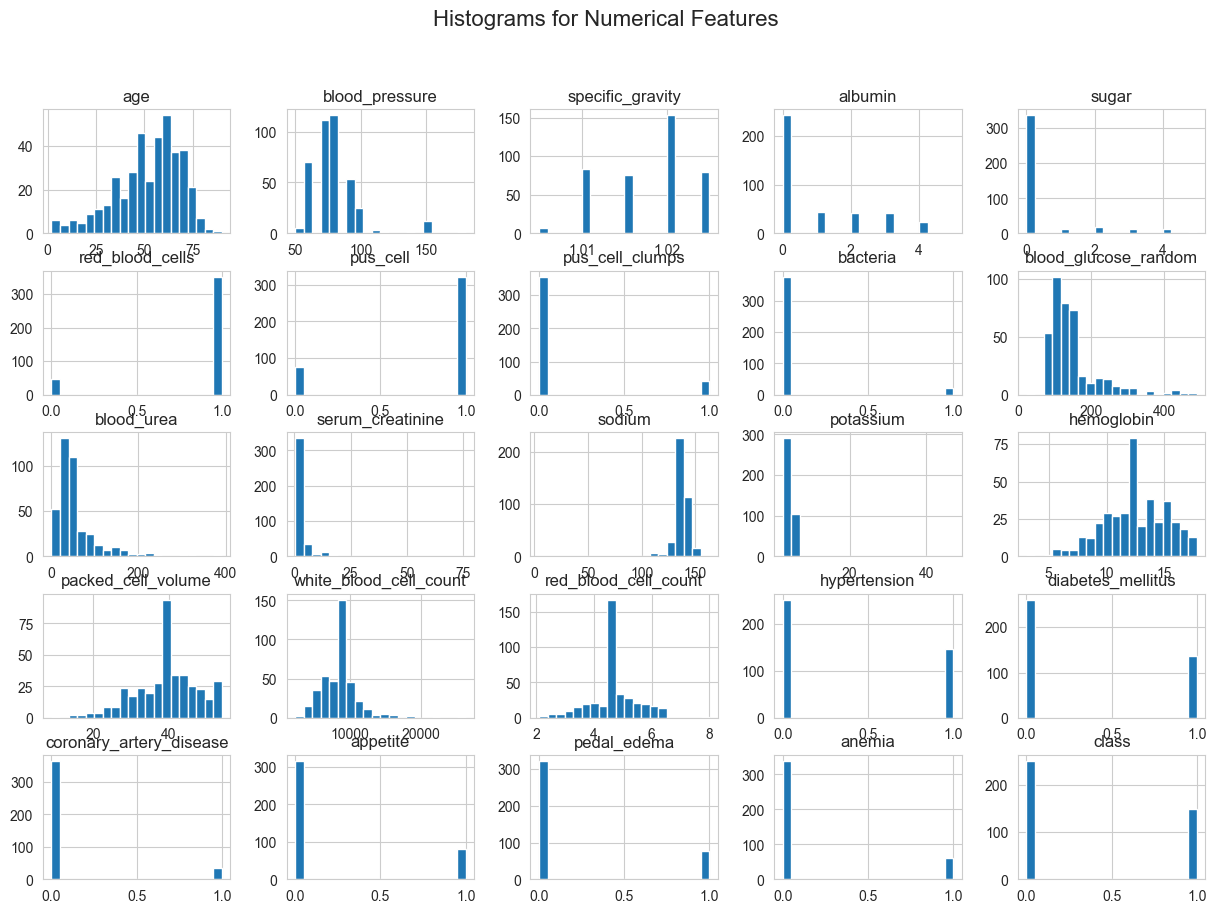

In [45]:
# Univariate analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Histogram for numerical columns
data.hist(figsize=(15, 10), bins=20)
plt.suptitle("Histograms for Numerical Features", fontsize=16)
plt.show()

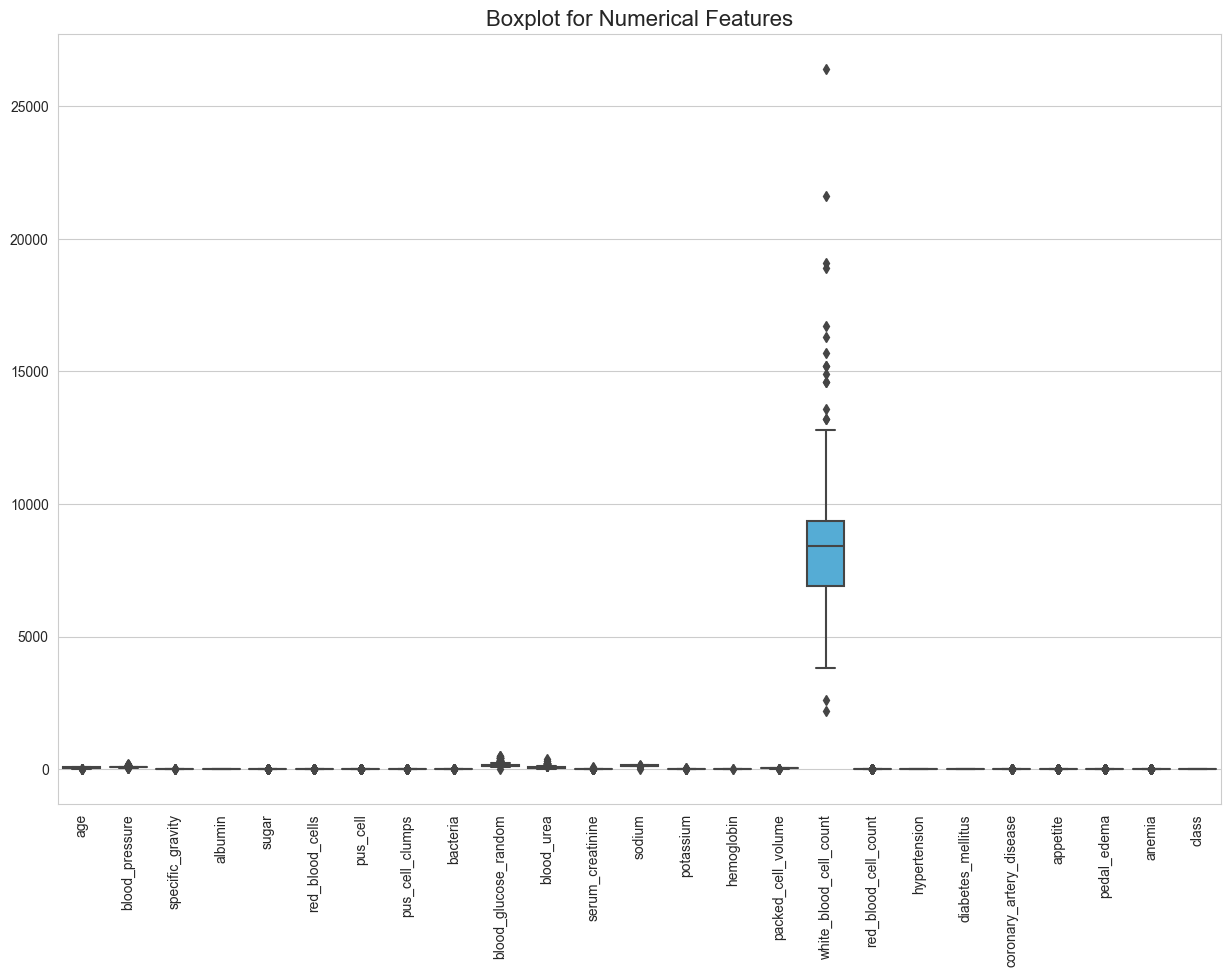

In [46]:

# Boxplot for numerical columns to visualize outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=data)
plt.title("Boxplot for Numerical Features", fontsize=16)
plt.xticks(rotation=90)
plt.show()

In [47]:
non_numeric_columns = data.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

# Drop non-numeric columns for correlation matrix calculation
numeric_data = data.drop(columns=non_numeric_columns)

# Compute correlation matrix with numeric data
correlation_matrix = numeric_data.corr()

Non-numeric columns: Index([], dtype='object')


In [48]:
correlation_matrix = numeric_data.corr()

In [49]:
correlation_matrix

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
age,1.000000,-0.058854,-0.163839,0.088593,0.185623,-0.019618,-0.103070,0.155120,0.040944,0.214894,...,-0.219591,0.099421,-0.203193,0.398002,0.366007,0.229200,0.155222,0.095568,0.056596,-0.233003
blood_pressure,-0.058854,1.000000,-0.158613,0.104990,0.132707,-0.098398,-0.107566,0.002361,0.053766,0.121884,...,-0.211766,0.031466,-0.158863,0.148684,0.143732,0.027047,0.094238,0.081583,0.148643,-0.262750
specific_gravity,-0.163839,-0.158613,1.000000,-0.478066,-0.290913,0.252664,0.363951,-0.305592,-0.231159,-0.314853,...,0.497696,-0.210666,0.442504,-0.320420,-0.348181,-0.134399,-0.228735,-0.251827,-0.182228,0.656517
albumin,0.088593,0.104990,-0.478066,1.000000,0.286883,-0.394184,-0.561037,0.417304,0.377605,0.308800,...,-0.473521,0.209140,-0.410079,0.404498,0.306376,0.200190,0.301947,0.410137,0.228479,-0.529959
sugar,0.185623,0.132707,-0.290913,0.286883,1.000000,-0.092307,-0.189317,0.167547,0.118998,0.629638,...,-0.180111,0.160036,-0.163038,0.253273,0.429854,0.228855,0.068315,0.115627,0.041695,-0.293426
red_blood_cells,-0.019618,-0.098398,0.252664,-0.394184,-0.092307,1.000000,0.376854,-0.102384,-0.184048,-0.152019,...,0.279966,-0.002899,0.201699,-0.139391,-0.144560,-0.110997,-0.160094,-0.198580,-0.106938,0.281550
pus_cell,-0.103070,-0.107566,0.363951,-0.561037,-0.189317,0.376854,1.000000,-0.519744,-0.330056,-0.261037,...,0.417525,-0.109017,0.382453,-0.290459,-0.199654,-0.171694,-0.274088,-0.349461,-0.259812,0.373800
pus_cell_clumps,0.155120,0.002361,-0.305592,0.417304,0.167547,-0.102384,-0.519744,1.000000,0.274788,0.196698,...,-0.293403,0.164384,-0.267342,0.194653,0.164257,0.187603,0.188992,0.103614,0.175267,-0.264278
bacteria,0.040944,0.053766,-0.231159,0.377605,0.118998,-0.184048,-0.330056,0.274788,1.000000,0.085196,...,-0.189144,0.104164,-0.191746,0.088264,0.079310,0.162087,0.148629,0.134244,0.051729,-0.186114
blood_glucose_random,0.214894,0.121884,-0.314853,0.308800,0.629638,-0.152019,-0.261037,0.196698,0.085196,1.000000,...,-0.264419,0.124142,-0.221218,0.368153,0.499398,0.211693,0.174644,0.099927,0.125555,-0.398904


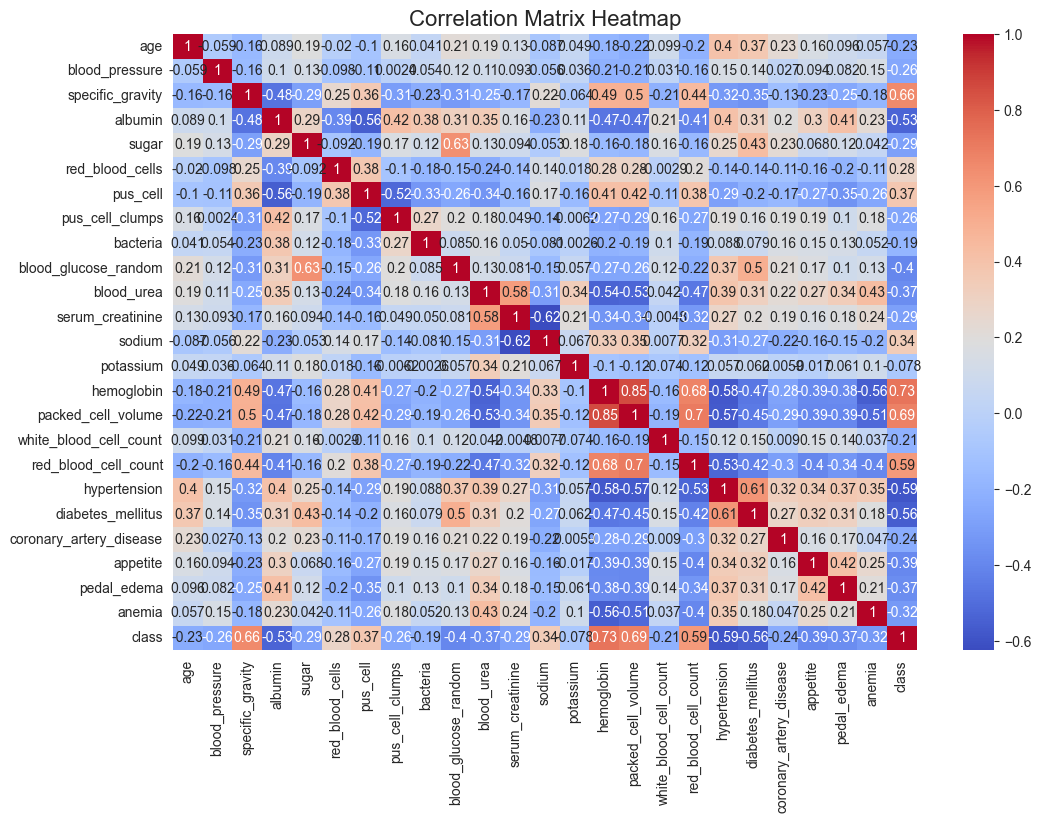

In [50]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Heatmap", fontsize=16)
plt.show()

In [51]:
correlation_pairs = correlation_matrix.unstack()

# Remove self-correlations
correlation_pairs = correlation_pairs[correlation_pairs != 1]

# Sort the correlation pairs to identify the highest correlations
sorted_correlation_pairs = correlation_pairs.sort_values(ascending=False)

# Print the highest correlations
print(sorted_correlation_pairs.head(10))

packed_cell_volume    hemoglobin              0.854246
hemoglobin            packed_cell_volume      0.854246
class                 hemoglobin              0.727471
hemoglobin            class                   0.727471
packed_cell_volume    red_blood_cell_count    0.703550
red_blood_cell_count  packed_cell_volume      0.703550
packed_cell_volume    class                   0.688176
class                 packed_cell_volume      0.688176
hemoglobin            red_blood_cell_count    0.682075
red_blood_cell_count  hemoglobin              0.682075
dtype: float64


In [52]:
# dropping packed_cell_volume since it is highly correlated
data.drop(['packed_cell_volume'],axis=1,inplace=True)

In [53]:
data

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,hemoglobin,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,15.4,7800.0,5.200000,1,1,0,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,11.3,6000.0,4.707435,0,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,9.6,7500.0,4.707435,0,1,0,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,11.2,6700.0,3.900000,1,0,0,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,11.6,7300.0,4.600000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.000000,...,15.7,6700.0,4.900000,0,0,0,0,0,0,1
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.000000,...,16.5,7800.0,6.200000,0,0,0,0,0,0,1
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.000000,...,15.8,6600.0,5.400000,0,0,0,0,0,0,1
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.000000,...,14.2,7200.0,5.900000,0,0,0,0,0,0,1


In [54]:
data.columns

Index(['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar',
       'red_blood_cells', 'pus_cell', 'pus_cell_clumps', 'bacteria',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'potassium', 'hemoglobin', 'white_blood_cell_count',
       'red_blood_cell_count', 'hypertension', 'diabetes_mellitus',
       'coronary_artery_disease', 'appetite', 'pedal_edema', 'anemia',
       'class'],
      dtype='object')

In [55]:
# sns.pairplot(data, hue='class')  # assuming 'classification' is the target variable
# plt.show()

# Feature Selection

In [56]:
from sklearn.feature_selection import SelectKBest, chi2

# Assuming 'class' is the target variable
X = data.drop('class', axis=1)
y = data['class']

# Feature selection
selector = SelectKBest(chi2, k='all')
selector.fit(X, y)
scores = selector.scores_

feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': scores})
print(feature_scores)

                    Feature         Score
0                       age    121.472607
1            blood_pressure    115.516965
2          specific_gravity      0.004945
3                   albumin    213.120000
4                     sugar     93.536000
5           red_blood_cells      3.725721
6                  pus_cell     10.619230
7           pus_cell_clumps     24.864000
8                  bacteria     13.024000
9      blood_glucose_random   2386.370660
10               blood_urea   2315.770375
11         serum_creatinine    350.745524
12                   sodium     28.688232
13                potassium      4.159338
14               hemoglobin    123.589482
15   white_blood_cell_count  13154.519143
16     red_blood_cell_count     20.841765
17             hypertension     87.024000
18        diabetes_mellitus     81.104000
19  coronary_artery_disease     20.128000
20                 appetite     48.544000
21              pedal_edema     44.992000
22                   anemia     35

In [57]:
data.drop(['specific_gravity'],axis=1,inplace=True)

In [58]:
data

,age,blood_pressure,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,blood_urea,...,hemoglobin,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia,class
0,48.0,80.0,1.0,0.0,1,1,0,0,121.000000,36.0,...,15.4,7800.0,5.200000,1,1,0,0,0,0,0
1,7.0,50.0,4.0,0.0,1,1,0,0,148.036517,18.0,...,11.3,6000.0,4.707435,0,0,0,0,0,0,0
2,62.0,80.0,2.0,3.0,1,1,0,0,423.000000,53.0,...,9.6,7500.0,4.707435,0,1,0,1,0,1,0
3,48.0,70.0,4.0,0.0,1,0,1,0,117.000000,56.0,...,11.2,6700.0,3.900000,1,0,0,1,1,1,0
4,51.0,80.0,2.0,0.0,1,1,0,0,106.000000,26.0,...,11.6,7300.0,4.600000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,0.0,0.0,1,1,0,0,140.000000,49.0,...,15.7,6700.0,4.900000,0,0,0,0,0,0,1
396,42.0,70.0,0.0,0.0,1,1,0,0,75.000000,31.0,...,16.5,7800.0,6.200000,0,0,0,0,0,0,1
397,12.0,80.0,0.0,0.0,1,1,0,0,100.000000,26.0,...,15.8,6600.0,5.400000,0,0,0,0,0,0,1
398,17.0,60.0,0.0,0.0,1,1,0,0,114.000000,50.0,...,14.2,7200.0,5.900000,0,0,0,0,0,0,1


In [59]:
data.shape[1]

23

In [60]:


# Get the feature names (column names)
features = data.columns

# Loop through each feature and print name with position
for i, feature in enumerate(features):
  print(f"{feature} ({i+1})")

age (1)
blood_pressure (2)
albumin (3)
sugar (4)
red_blood_cells (5)
pus_cell (6)
pus_cell_clumps (7)
bacteria (8)
blood_glucose_random (9)
blood_urea (10)
serum_creatinine (11)
sodium (12)
potassium (13)
hemoglobin (14)
white_blood_cell_count (15)
red_blood_cell_count (16)
hypertension (17)
diabetes_mellitus (18)
coronary_artery_disease (19)
appetite (20)
pedal_edema (21)
anemia (22)
class (23)


In [61]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X, y)

# Get feature importances
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Select the most important features
num_features = 10
selected_features = indices[:num_features]
X_selected = X.iloc[:, selected_features]


Feature ranking:
1. feature 14 (0.263206)
2. feature 11 (0.139550)
3. feature 16 (0.120993)
4. feature 2 (0.113203)
5. feature 3 (0.061380)
6. feature 9 (0.059789)
7. feature 17 (0.054399)
8. feature 18 (0.044061)
9. feature 10 (0.032123)
10. feature 12 (0.030558)
11. feature 1 (0.016548)
12. feature 0 (0.015007)
13. feature 15 (0.010616)
14. feature 13 (0.008203)
15. feature 20 (0.008023)
16. feature 21 (0.007665)
17. feature 6 (0.005454)
18. feature 4 (0.005280)
19. feature 5 (0.002788)
20. feature 22 (0.001067)
21. feature 7 (0.000089)
22. feature 8 (0.000000)
23. feature 19 (0.000000)


In [62]:

from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel

model = LogisticRegression()
model.fit(X, y)

# Get feature importances
importances = model.coef_[0]
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Select the most important features
num_features = 10
selected_features = indices[:num_features]
X_selected = X.iloc[:, selected_features]

Feature ranking:
1. feature 14 (1.658797)
2. feature 16 (0.406772)
3. feature 6 (0.086399)
4. feature 5 (0.075678)
5. feature 0 (0.036370)
6. feature 15 (-0.000154)
7. feature 2 (-0.010423)
8. feature 8 (-0.027603)
9. feature 10 (-0.036998)
10. feature 13 (-0.038319)
11. feature 19 (-0.047433)
12. feature 4 (-0.050109)
13. feature 7 (-0.053196)
14. feature 9 (-0.053536)
15. feature 12 (-0.066607)
16. feature 22 (-0.067921)
17. feature 1 (-0.080606)
18. feature 20 (-0.142930)
19. feature 21 (-0.179571)
20. feature 18 (-0.192196)
21. feature 17 (-0.223778)
22. feature 3 (-0.734233)
23. feature 11 (-0.746819)


C:\Users\Yash\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [63]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_selection import mutual_info_classif

# Calculate mutual information between each feature and the target variable
mutual_info = mutual_info_classif(X, y)

# Get feature importances
indices = np.argsort(mutual_info)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], mutual_info[indices[f]]))

# Select the most important features
num_features = 10
selected_features = indices[:num_features]
X_selected = X.iloc[:, selected_features]

Feature ranking:
1. feature 14 (0.453157)
2. feature 16 (0.398657)
3. feature 11 (0.363197)
4. feature 2 (0.298038)
5. feature 3 (0.275955)
6. feature 12 (0.263874)
7. feature 17 (0.232639)
8. feature 18 (0.231680)
9. feature 9 (0.186971)
10. feature 10 (0.185031)
11. feature 1 (0.183468)
12. feature 13 (0.180611)
13. feature 20 (0.155208)
14. feature 6 (0.128119)
15. feature 15 (0.116128)
16. feature 21 (0.105318)
17. feature 4 (0.083578)
18. feature 22 (0.070562)
19. feature 7 (0.045287)
20. feature 19 (0.036073)
21. feature 0 (0.034895)
22. feature 5 (0.024979)
23. feature 8 (0.021606)


In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import SelectKBest, f_classif

# Calculate F-value for each feature
F, p = f_classif(X, y)

# Get feature importances
indices = np.argsort(F)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], F[indices[f]]))

# Select the most important features
num_features = 10
selected_features = indices[:num_features]
X_selected = X.iloc[:, selected_features]

Feature ranking:
1. feature 14 (445.146637)
2. feature 2 (299.974929)
3. feature 16 (211.880055)
4. feature 17 (210.161877)
5. feature 18 (178.531952)
6. feature 3 (154.654895)
7. feature 9 (74.937535)
8. feature 20 (71.875090)
9. feature 21 (64.318836)
10. feature 6 (64.318836)
11. feature 10 (63.197566)
12. feature 12 (52.460014)
13. feature 22 (46.501984)
14. feature 4 (37.307236)
15. feature 11 (37.222014)
16. feature 5 (34.093819)
17. feature 7 (29.734441)
18. feature 1 (29.366211)
19. feature 19 (23.179229)
20. feature 0 (22.733147)
21. feature 15 (18.065514)
22. feature 8 (14.208939)
23. feature 13 (2.416415)


In [65]:
data['sugar']

0      0.0
1      0.0
2      3.0
3      0.0
4      0.0
      ... 
395    0.0
396    0.0
397    0.0
398    0.0
399    0.0
Name: sugar, Length: 398, dtype: float64

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Logistic Regression
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
print("Logistic Regression Accuracy:", accuracy_score(y_test, lr_pred))
print("Logistic Regression F1 Score:", f1_score(y_test, lr_pred, average='weighted'))
print("Logistic Regression Confusion Matrix:\n", confusion_matrix(y_test, lr_pred))



Logistic Regression Accuracy: 0.9625
Logistic Regression F1 Score: 0.962940725600409
Logistic Regression Confusion Matrix:
 [[50  3]
 [ 0 27]]


C:\Users\Yash\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
# Naive Bayes
nb = GaussianNB()
nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
print("Naive Bayes Accuracy:", accuracy_score(y_test, nb_pred))
print("Naive Bayes F1 Score:", f1_score(y_test, nb_pred, average='weighted'))
print("Naive Bayes Confusion Matrix:\n", confusion_matrix(y_test, nb_pred))

Naive Bayes Accuracy: 1.0
Naive Bayes F1 Score: 1.0
Naive Bayes Confusion Matrix:
 [[53  0]
 [ 0 27]]


In [68]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict and evaluate the model
rf_pred = rf.predict(X_test)
accuracy = accuracy_score(y_test, rf_pred)
f1 = f1_score(y_test, rf_pred, average='weighted')
conf_matrix = confusion_matrix(y_test, rf_pred)

print("Random Forest Accuracy:", accuracy)
print("Random Forest F1 Score:", f1)
print("Random Forest Confusion Matrix:\n", conf_matrix)

Random Forest Accuracy: 1.0
Random Forest F1 Score: 1.0
Random Forest Confusion Matrix:
 [[53  0]
 [ 0 27]]


In [69]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold, SelectKBest, chi2, RFE
from sklearn.linear_model import LogisticRegression

# Step 1: Variance Threshold
var_threshold = VarianceThreshold(threshold=0.1)
X_var = var_threshold.fit_transform(X)

# Get selected feature names after Variance Threshold
selected_var_indices = var_threshold.get_support(indices=True)
selected_var_columns = X.columns[selected_var_indices]
X_var_df = pd.DataFrame(X_var, columns=selected_var_columns)
print("Selected columns after Variance Threshold:", selected_var_columns)

# Step 2: SelectKBest
k_best = SelectKBest(chi2, k='all')
X_k_best = k_best.fit_transform(X_var_df, y)

# Get selected feature names after SelectKBest
selected_k_best_indices = k_best.get_support(indices=True)
selected_k_best_columns = X_var_df.columns[selected_k_best_indices]
X_k_best_df = pd.DataFrame(X_k_best, columns=selected_k_best_columns)
print("Selected columns after SelectKBest:", selected_k_best_columns)

# Step 3: RFE
model = LogisticRegression(max_iter=10000)
rfe = RFE(model, n_features_to_select=10)
X_rfe = rfe.fit_transform(X_k_best_df, y)

# Get selected feature names after RFE
selected_rfe_indices = rfe.get_support(indices=True)
selected_rfe_columns = X_k_best_df.columns[selected_rfe_indices]
X_rfe_df = pd.DataFrame(X_rfe, columns=selected_rfe_columns)
print("Selected columns after RFE:", selected_rfe_columns)

Selected columns after Variance Threshold: Index(['age', 'blood_pressure', 'albumin', 'sugar', 'red_blood_cells',
       'pus_cell', 'blood_glucose_random', 'blood_urea', 'serum_creatinine',
       'sodium', 'potassium', 'hemoglobin', 'white_blood_cell_count',
       'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'appetite',
       'pedal_edema', 'anemia'],
      dtype='object')
Selected columns after SelectKBest: Index(['age', 'blood_pressure', 'albumin', 'sugar', 'red_blood_cells',
       'pus_cell', 'blood_glucose_random', 'blood_urea', 'serum_creatinine',
       'sodium', 'potassium', 'hemoglobin', 'white_blood_cell_count',
       'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'appetite',
       'pedal_edema', 'anemia'],
      dtype='object')
Selected columns after RFE: Index(['albumin', 'sugar', 'red_blood_cells', 'serum_creatinine', 'hemoglobin',
       'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'appetite',
       'pedal_edema'],
    

In [70]:
# Step 3: RFE
model = LogisticRegression(max_iter=10000)
rfe = RFE(model, n_features_to_select=10)
X_rfe = rfe.fit_transform(X_k_best_df, y)

# Get selected feature names after RFE
selected_rfe_indices = rfe.get_support(indices=True)
selected_rfe_columns = X_k_best_df.columns[selected_rfe_indices]
X_rfe_df = pd.DataFrame(X_rfe, columns=selected_rfe_columns)
print("Selected columns after RFE:", selected_rfe_columns)

Selected columns after RFE: Index(['albumin', 'sugar', 'red_blood_cells', 'serum_creatinine', 'hemoglobin',
       'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'appetite',
       'pedal_edema'],
      dtype='object')


Logistic Regression Accuracy: 0.95
Naive Bayes Accuracy: 1.0
Random Forest Accuracy: 1.0


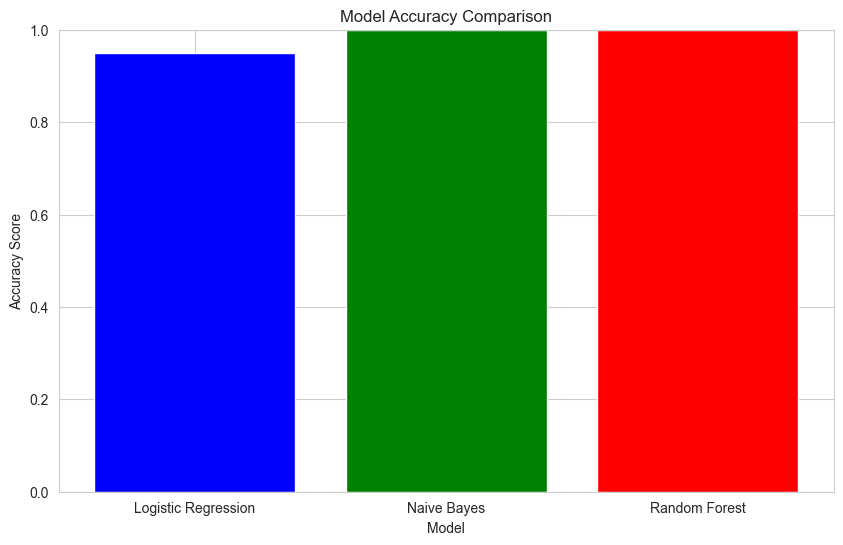

In [71]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(max_iter=10000),
    "Naive Bayes": GaussianNB(),
    "Random Forest": RandomForestClassifier(random_state=42)
}

# Train and evaluate models
accuracy_scores = {}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy
    print(f"{model_name} Accuracy: {accuracy}")

# Plot accuracy scores
plt.figure(figsize=(10, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()

In [72]:
X

,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,potassium,hemoglobin,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,pedal_edema,anemia
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,4.627244,15.4,7800.0,5.200000,1,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,4.627244,11.3,6000.0,4.707435,0,0,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,4.627244,9.6,7500.0,4.707435,0,1,0,1,0,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,2.500000,11.2,6700.0,3.900000,1,0,0,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,4.627244,11.6,7300.0,4.600000,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1.020,0.0,0.0,1,1,0,0,140.000000,...,4.900000,15.7,6700.0,4.900000,0,0,0,0,0,0
396,42.0,70.0,1.025,0.0,0.0,1,1,0,0,75.000000,...,3.500000,16.5,7800.0,6.200000,0,0,0,0,0,0
397,12.0,80.0,1.020,0.0,0.0,1,1,0,0,100.000000,...,4.400000,15.8,6600.0,5.400000,0,0,0,0,0,0
398,17.0,60.0,1.025,0.0,0.0,1,1,0,0,114.000000,...,4.900000,14.2,7200.0,5.900000,0,0,0,0,0,0


In [73]:
data.shape[1]

23

In [74]:
data_trail = data[(selected_rfe_columns)]

In [75]:
data_trail

,albumin,sugar,red_blood_cells,serum_creatinine,hemoglobin,red_blood_cell_count,hypertension,diabetes_mellitus,appetite,pedal_edema
0,1.0,0.0,1,1.2,15.4,5.200000,1,1,0,0
1,4.0,0.0,1,0.8,11.3,4.707435,0,0,0,0
2,2.0,3.0,1,1.8,9.6,4.707435,0,1,1,0
3,4.0,0.0,1,3.8,11.2,3.900000,1,0,1,1
4,2.0,0.0,1,1.4,11.6,4.600000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,1,0.5,15.7,4.900000,0,0,0,0
396,0.0,0.0,1,1.2,16.5,6.200000,0,0,0,0
397,0.0,0.0,1,0.6,15.8,5.400000,0,0,0,0
398,0.0,0.0,1,1.0,14.2,5.900000,0,0,0,0


In [76]:
#training data based on 10 selected columns based on RFE
X_train1, X_test1, y_train1, y_test1 = train_test_split(data_trail, y, test_size=0.2, random_state=42)

In [77]:
# Initialize models
logistic_model = LogisticRegression(max_iter=10000)
naive_bayes_model = GaussianNB()
random_forest_model = RandomForestClassifier(random_state=42)


In [78]:
# Train models
logistic_model.fit(X_train1, y_train1)


LogisticRegression(max_iter=10000)

In [79]:
naive_bayes_model.fit(X_train1, y_train1)


GaussianNB()

In [80]:
random_forest_model.fit(X_train1, y_train1)


RandomForestClassifier(random_state=42)

In [81]:
# Predictions
logistic_pred = logistic_model.predict(X_test1)
naive_bayes_pred = naive_bayes_model.predict(X_test1)
random_forest_pred = random_forest_model.predict(X_test1)

In [82]:
# Evaluation
models = {
    "Logistic Regression": logistic_model,
    "Naive Bayes": naive_bayes_model,
    "Random Forest": random_forest_model
}

In [83]:
accuracy_scores = {}
f1_scores = {}
confusion_matrices = {}

for model_name, model in models.items():
    if model_name == "Logistic Regression":
        y_pred = logistic_pred
    elif model_name == "Naive Bayes":
        y_pred = naive_bayes_pred
    elif model_name == "Random Forest":
        y_pred = random_forest_pred
    
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    
    accuracy_scores[model_name] = accuracy
    f1_scores[model_name] = f1
    confusion_matrices[model_name] = cm
    
    print(f"{model_name} Accuracy: {accuracy}")
    print(f"{model_name} F1 Score: {f1}")
    print(f"{model_name} Confusion Matrix:\n{cm}\n")

Logistic Regression Accuracy: 0.975
Logistic Regression F1 Score: 0.9752060439560438
Logistic Regression Confusion Matrix:
[[51  2]
 [ 0 27]]

Naive Bayes Accuracy: 1.0
Naive Bayes F1 Score: 1.0
Naive Bayes Confusion Matrix:
[[53  0]
 [ 0 27]]

Random Forest Accuracy: 1.0
Random Forest F1 Score: 1.0
Random Forest Confusion Matrix:
[[53  0]
 [ 0 27]]



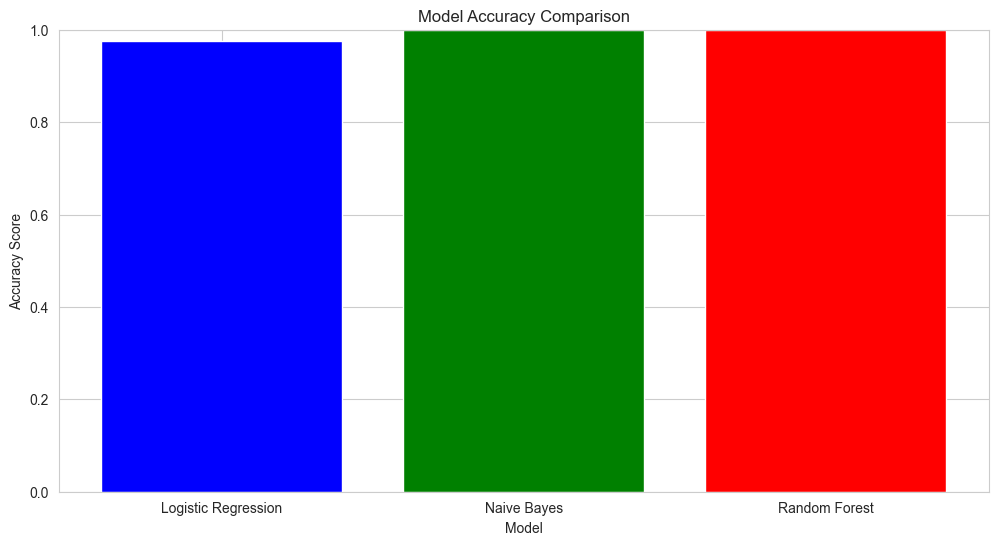

In [84]:
# Plot accuracy scores
plt.figure(figsize=(12, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)  # Accuracy ranges from 0 to 1
plt.show()

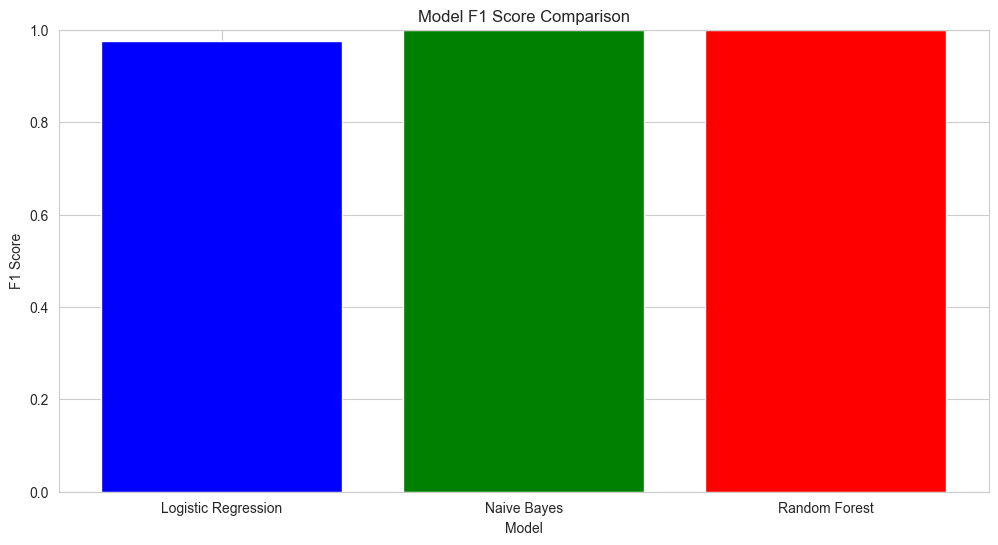

In [85]:
# Plot F1 scores
plt.figure(figsize=(12, 6))
plt.bar(f1_scores.keys(), f1_scores.values(), color=['blue', 'green', 'red'])
plt.xlabel('Model')
plt.ylabel('F1 Score')
plt.title('Model F1 Score Comparison')
plt.ylim(0, 1)  # F1 Score ranges from 0 to 1
plt.show()

In [86]:
data_trail

,albumin,sugar,red_blood_cells,serum_creatinine,hemoglobin,red_blood_cell_count,hypertension,diabetes_mellitus,appetite,pedal_edema
0,1.0,0.0,1,1.2,15.4,5.200000,1,1,0,0
1,4.0,0.0,1,0.8,11.3,4.707435,0,0,0,0
2,2.0,3.0,1,1.8,9.6,4.707435,0,1,1,0
3,4.0,0.0,1,3.8,11.2,3.900000,1,0,1,1
4,2.0,0.0,1,1.4,11.6,4.600000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,1,0.5,15.7,4.900000,0,0,0,0
396,0.0,0.0,1,1.2,16.5,6.200000,0,0,0,0
397,0.0,0.0,1,0.6,15.8,5.400000,0,0,0,0
398,0.0,0.0,1,1.0,14.2,5.900000,0,0,0,0


In [87]:
data_trail = pd.concat((data_trail,y),axis=1)

In [88]:
data_trail

,albumin,sugar,red_blood_cells,serum_creatinine,hemoglobin,red_blood_cell_count,hypertension,diabetes_mellitus,appetite,pedal_edema,class
0,1.0,0.0,1,1.2,15.4,5.200000,1,1,0,0,0
1,4.0,0.0,1,0.8,11.3,4.707435,0,0,0,0,0
2,2.0,3.0,1,1.8,9.6,4.707435,0,1,1,0,0
3,4.0,0.0,1,3.8,11.2,3.900000,1,0,1,1,0
4,2.0,0.0,1,1.4,11.6,4.600000,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,1,0.5,15.7,4.900000,0,0,0,0,1
396,0.0,0.0,1,1.2,16.5,6.200000,0,0,0,0,1
397,0.0,0.0,1,0.6,15.8,5.400000,0,0,0,0,1
398,0.0,0.0,1,1.0,14.2,5.900000,0,0,0,0,1


In [89]:
data_trail.to_csv("reduced.csv")

In [90]:
pred1 = logistic_model.predict([[1,0,1,1.2,15.4,5.2,1,1,0,0]])
pred1

C:\Users\Yash\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [91]:
pred2 = logistic_model.predict([[0,0,1,1.1,15.8,6.1,0,0,0,0]])
pred2

C:\Users\Yash\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([1])

In [92]:
pred11 = naive_bayes_model.predict([[1,0,1,1.2,15.4,5.2,1,1,0,0]])
pred11

C:\Users\Yash\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array([0])

In [93]:
pred12 = naive_bayes_model.predict([[0,0,1,1.1,15.8,6.1,0,0,0,0]])

C:\Users\Yash\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


In [94]:
pred12

array([1])

In [95]:
pred13 = random_forest_model.predict([[1,0,1,1.2,15.4,5.2,1,1,0,0]])
pred13

C:\Users\Yash\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])

In [96]:
pred23 = random_forest_model.predict([[0,0,1,1.1,15.8,6.1,0,0,0,0]])
pred23

C:\Users\Yash\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([1])

In [97]:
data_trail1 = data_trail.drop(['class'],axis=1)

In [98]:
data_trail1

,albumin,sugar,red_blood_cells,serum_creatinine,hemoglobin,red_blood_cell_count,hypertension,diabetes_mellitus,appetite,pedal_edema
0,1.0,0.0,1,1.2,15.4,5.200000,1,1,0,0
1,4.0,0.0,1,0.8,11.3,4.707435,0,0,0,0
2,2.0,3.0,1,1.8,9.6,4.707435,0,1,1,0
3,4.0,0.0,1,3.8,11.2,3.900000,1,0,1,1
4,2.0,0.0,1,1.4,11.6,4.600000,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
395,0.0,0.0,1,0.5,15.7,4.900000,0,0,0,0
396,0.0,0.0,1,1.2,16.5,6.200000,0,0,0,0
397,0.0,0.0,1,0.6,15.8,5.400000,0,0,0,0
398,0.0,0.0,1,1.0,14.2,5.900000,0,0,0,0


In [99]:
data_trail1.columns

Index(['albumin', 'sugar', 'red_blood_cells', 'serum_creatinine', 'hemoglobin',
       'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'appetite',
       'pedal_edema'],
      dtype='object')

In [100]:
import pickle 

In [101]:
# Save the Naive Bayes model to a file
naive_bayes_model_filename = 'naive_bayes_model.pkl'
with open(naive_bayes_model_filename, 'wb') as file:
    pickle.dump(naive_bayes_model, file)
print(f'Naive Bayes model saved to {naive_bayes_model_filename}')

Naive Bayes model saved to naive_bayes_model.pkl


In [102]:
random_forest_model_filename = 'random_forest_model.pkl'
with open(random_forest_model_filename, 'wb') as file:
    pickle.dump(random_forest_model, file)
print(f'Random Forest model saved to {random_forest_model_filename}')

Random Forest model saved to random_forest_model.pkl


In [103]:
data_trail1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 398 entries, 0 to 399
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   albumin               398 non-null    float64
 1   sugar                 398 non-null    float64
 2   red_blood_cells       398 non-null    int32  
 3   serum_creatinine      398 non-null    float64
 4   hemoglobin            398 non-null    float64
 5   red_blood_cell_count  398 non-null    float64
 6   hypertension          398 non-null    int32  
 7   diabetes_mellitus     398 non-null    int32  
 8   appetite              398 non-null    int32  
 9   pedal_edema           398 non-null    int32  
dtypes: float64(5), int32(5)
memory usage: 26.4 KB


In [104]:
from sklearn.metrics import classification_report

print("Logistic Regression Classification Report:")
print(classification_report(y_test1, logistic_pred ))

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.96      0.98        53
           1       0.93      1.00      0.96        27

    accuracy                           0.97        80
   macro avg       0.97      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



In [105]:
print("Naive Bayes Classification Report:")
print(classification_report(y_test1, naive_bayes_pred))

Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        27

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



In [106]:
print("Random Forest Classification Report:")
print(classification_report(y_test1, random_forest_pred))



Random Forest Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        27

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

